In [78]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3bb50a83-260e-4013-8504-06f39f416e6a', project_access_token='p-72af1d306d5fd95058bfabe1a0b8ee340575b7d2')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [79]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [80]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [81]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [82]:
import pandas as pd
import numpy  as np

In [83]:
# Insira aqui o pandasDataFrame.
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c7e6595abc744e069b18b5eacdb9a257 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5OW71h8PP4q3AvEdrwT5T33MBHggYdU5Fb0kPQgIyl-P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c7e6595abc744e069b18b5eacdb9a257.get_object(Bucket='mbtcdesafio7tnt-donotdelete-pr-nbebj2zgnkc11g',Key='leitura_iot.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
0,2018-6-12,Luz,-23.5365,-46.6332,124080,34,17,65,30,23,20,43,34,NORMAL
1,2018-7-9,Luz,-23.5365,-46.6332,125491,33,45,61,21,43,38,31,10,NORMAL
2,2018-8-28,Luz,-23.5365,-46.6332,125917,79,10,8,37,32,30,18,15,NORMAL
3,2019-1-18,Luz,-23.5365,-46.6332,124657,66,65,12,37,30,20,19,24,NORMAL
4,2019-2-14,Luz,-23.5365,-46.6332,125653,86,18,29,38,23,30,11,14,NORMAL


In [84]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
25864,2019-11-6,Fradique Coutinho,-23.5661,-46.6841,35992,28,54,21,28,16,4,14,16,REABASTECER
25865,2018-1-24,Luz,-23.5365,-46.6332,125589,22,45,38,12,26,15,34,27,NORMAL
25866,2019-4-10,Luz,-23.5365,-46.6332,126727,58,9,39,22,10,20,4,39,REABASTECER
25867,2019-6-25,Luz,-23.5365,-46.6332,123911,19,32,5,7,16,28,43,30,NORMAL
25868,2018-11-6,Ana Rosa,-23.5813,-46.6383,64974,86,52,49,22,10,12,21,36,NORMAL


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [85]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25869 entries, 0 to 25868
Data columns (total 14 columns):
Tempo           25869 non-null object
Estação         25869 non-null object
LAT             25869 non-null float64
LONG            25869 non-null float64
Movimentação    25869 non-null int64
Original_473    25869 non-null int64
Original_269    25869 non-null int64
Zero            25869 non-null int64
Maçã-Verde      25869 non-null int64
Tangerina       25869 non-null int64
Citrus          25869 non-null int64
Açaí-Guaraná    25869 non-null int64
Pêssego         25869 non-null int64
TARGET          25869 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 2.8+ MB


In [86]:
df_training_dataset.nunique()

Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    12137
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
dtype: int64

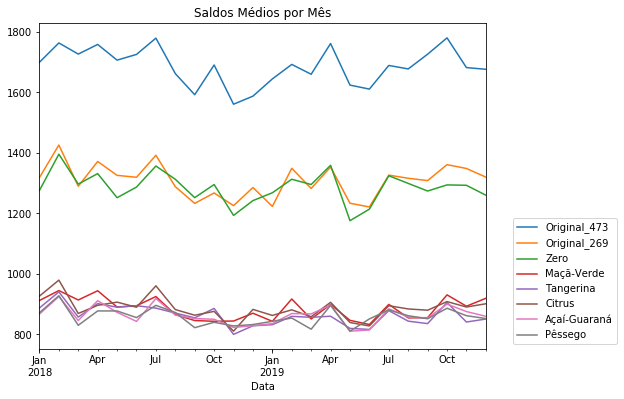

In [87]:
import matplotlib.pyplot as plt

df = df_training_dataset.copy()

df['Tempo'].replace({'2018-2-29' : '2018-2-28',
                           '2018-2-30' : '2018-2-18',
                           '2019-2-29' : '2019-2-28',
                           '2019-2-30' : '2019-2-28',
                           },
                          inplace=True)

df['Data'] = pd.to_datetime(df['Tempo'], format='%Y-%m-%d')
df.set_index('Data', inplace=True)

prods = ['Original_473', 'Original_269', 'Zero', 'Maçã-Verde',
         'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego']

gr = df.groupby(['Data']).sum()
gr = gr[prods].groupby(pd.Grouper(freq="M")).mean()

#plt.imshow(cm, interpolation='nearest', cmap=cmap)    
gr.plot.line(title='Saldos Médios por Mês', figsize=(8, 6))
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
plt.show()

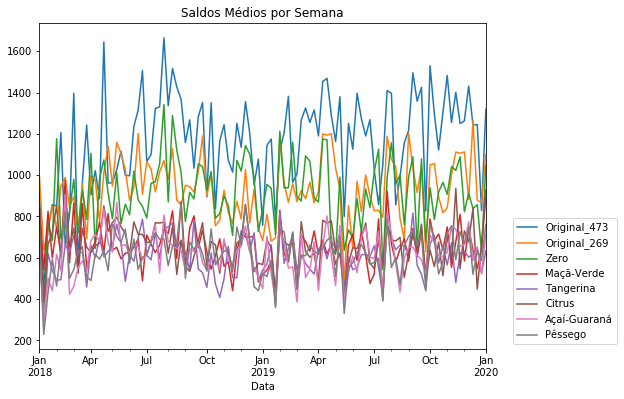

In [88]:
gr = df.groupby('Data').sum()
gr = gr[prods].groupby(pd.Grouper(freq="W")).min()
gr.plot.line(title='Saldos Médios por Semana', figsize=(8, 6))
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
plt.show()

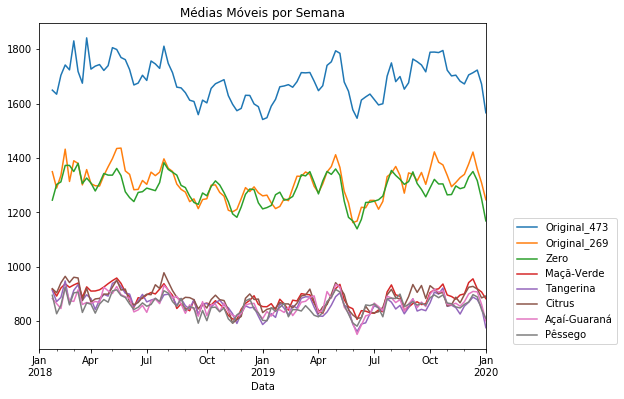

In [89]:
gr = df.groupby('Data').sum()
gr = gr[prods].groupby(pd.Grouper(freq="W")).mean().rolling(window=4).mean()
gr.plot.line(title='Médias Móveis por Semana', figsize=(8, 6))
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
plt.show()

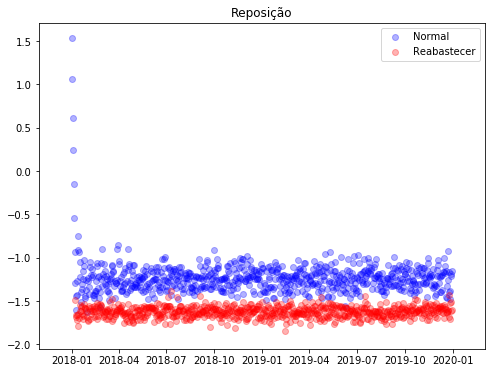

In [90]:
gr = df.copy()

a = gr[prods].apply(lambda x : (x - np.mean(x))/np.std(x), axis=0)
a['Minimo'] = a[prods].apply(lambda x: np.min(x[prods]), axis=1)
a = pd.concat([a, gr['TARGET']], axis=1)
a = a.sort_values('Data').reset_index(drop=False)

a = a.pivot_table(index='Data', columns='TARGET', values='Minimo')


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=a.index,
           y=a['NORMAL'],
           c='blue',
           label='Normal',
           alpha=0.3
           )
ax.scatter(x=a.index,
           y=a['REABASTECER'],
           c='red',
           label='Reabastecer',
           alpha=0.3
           )

ax.set_title('Reposição')
ax.legend()
plt.show()

del [df, gr]

Os gráficos acima sugerem que o menor saldo do produto no estoque, e a sazonalidade sejam importantes influenciadores do momento de reposição dos estoques.

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [91]:
# Elimina linhas duplicadas
print(df_training_dataset.duplicated().sum())

12347


In [92]:
df_training_dataset.drop_duplicates(inplace=True)
print(df_training_dataset.duplicated().sum())

0


In [93]:
# Datas com problemas
print(df_training_dataset[pd.to_datetime(df_training_dataset['Tempo'], format='%Y-%m-%d',
                        errors='coerce').isna()]['Tempo'].value_counts())

2019-2-29    20
2018-2-29    19
2019-2-30    19
2018-2-30    19
Name: Tempo, dtype: int64


### Verificando nulos

In [94]:
print(df_training_dataset.isnull().sum())

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64


### Prepara variáveis de controle 

In [95]:
# Lista de colunas não utilizadas
drop_cols = ['LAT', 'LONG', 'Movimentação', 'Tempo', 'Data']

# Cria lista das colunas categóricas
col_cat = [col for col in df_training_dataset.nunique().index if  (df_training_dataset[col].dtype == 'O')
                                                                & (col not in ['TARGET', 'Tempo'])
           ]

# Busca categorias das colunas categóricas
categorias = {}
for col in col_cat:    
    categorias[col]= list(df_training_dataset[col].value_counts().index)
    
# Lista de colunas categóricas a codificar
col_cat = [col for col in col_cat if col not in drop_cols]

# Lista colunas numéricas
col_num = [col for col in df_training_dataset.columns if col not in \
                                 (col_cat + drop_cols + ['TARGET', 'Tempo'])]


### Cria partições de teste e treino

In [96]:
X = df_training_dataset.iloc[:,:-1]
y = df_training_dataset.iloc[:,-1]

from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 123)

# Apaga variáveis já utilizadas
del [X, y, col]

## Pre-processando o dataset antes do treinamento

### Corrigindo valores de datas

Vamos substituir os valores de datas erradas por uma data próxima válida:

In [97]:
features = X_train.copy()

features['Tempo'].replace({'2018-2-29' : '2018-2-28',
                           '2018-2-30' : '2018-2-18',
                           '2019-2-29' : '2019-2-28',
                           '2019-2-30' : '2019-2-28',
                           },
                          inplace=True)

### Cria campos de datas (para usar efeito sazonal no modelo)

In [98]:
features['Data'] = pd.to_datetime(features['Tempo'], format='%Y-%m-%d')

# Cria campos de Data
features['Dia'] = features['Data'].dt.day
features['Semana'] = features['Data'].dt.week.astype('int64')
features['DiaSemana'] = features['Data'].dt.weekday
features['Mes'] = features['Data'].dt.month
features['AnoMes'] = features['Data'].dt.strftime('%Y%m').astype('int64')

col_num.extend(['Dia', 'Semana', 'DiaSemana', 'Mes', 'AnoMes'])

### Cria coluna de estoque mais baixo dos produtos

In [99]:
# Cria coluna com estoque mínimo
prods = ['Original_473', 'Original_269', 'Zero', 'Maçã-Verde',
         'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego']

# Normaliza os campos de valor de estoque
from sklearn.preprocessing    import OneHotEncoder, StandardScaler

scaler = StandardScaler()
features[prods] = scaler.fit_transform(features[prods])

# Cria coluna com menor estoque
features['Mínimo'] = features[prods].apply(np.min, axis='columns')

col_num.extend(['Mínimo'])

In [100]:
# Elimina colunas não utilizadas
features.drop(columns = drop_cols, inplace= True)

### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [101]:
# Separação em colunas categóricas e numéricas                                   
categorical_columns = features.loc[:, col_cat]
numeric_columns     = features.loc[:, col_num]

# Gera lista de categorias a codificar
lista_cat = [categorias[col] for col in col_cat]

# Codifica Colunas Categóricas
ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)

a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')
del [a, b]

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Treinando um modelo com Extreme Gradient Boosting

In [102]:
from sklearn.metrics          import f1_score, accuracy_score,\
                                     confusion_matrix, roc_auc_score,\
                                     plot_confusion_matrix
# Balanceamento das categorias
from imblearn.over_sampling   import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

# Algoritmo utilizado
import xgboost                as xgb

### Treinamento do modelo com parâmetros ajustados localmente

In [103]:
# Balanceamento
features, y_train = SMOTE(sampling_strategy='auto').fit_resample(features, y_train)
features, y_train = RandomUnderSampler(sampling_strategy='auto', random_state=555).fit_resample(features, y_train)

In [105]:
# XGBoost model
model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic',
                          eval_metric='merror', n_estimators= 100,
                          max_depth=6, min_child_weight=0.25, gamma=0,
                          subsample=1, colsample_bytree=1, eta=0.3, n_jobs=4)


In [106]:
# Treina modelo
model.fit(features, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=0.25, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Ajustando matriz de testes

In [108]:
features = X_test.copy()

# Substitui datas erradas (2019-2-29)
features['Tempo'].replace({'2018-2-29' : '2018-2-28',
                           '2018-2-30' : '2018-2-18',
                           '2019-2-29' : '2019-2-28',
                           '2019-2-30' : '2019-2-28',
                           },
                          inplace=True)

# Cria colunas de datas
features['Data'] = pd.to_datetime(features['Tempo'], format='%Y-%m-%d')
features['Dia'] = features['Data'].dt.day
features['Semana'] = features['Data'].dt.week.astype('int64')
features['DiaSemana'] = features['Data'].dt.weekday
features['Mes'] = features['Data'].dt.month
features['AnoMes'] = features['Data'].dt.strftime('%Y%m').astype('int64')

# Cria coluna com estoque mínimo
features[prods] = scaler.transform(features[prods])
features['Mínimo'] = features[prods].apply(np.min, axis='columns')

# Elimina colunas não utilizadas
features.drop(columns = drop_cols, inplace= True)
                                   
# Separação em colunas categóricas e numéricas                
categorical_columns = features.loc[:, col_cat]
numeric_columns     = features.loc[:, col_num]

# Codifica Colunas Categóricas
a = ohe.transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

del [a, b]

### Fazendo previsões na amostra de teste

In [109]:
y_pred = model.predict(features)
print(y_pred)

['NORMAL' 'NORMAL' 'NORMAL' ... 'NORMAL' 'REABASTECER' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

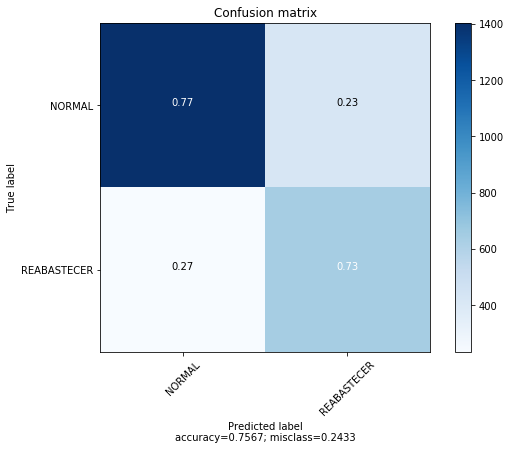

In [111]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

# Treinando com os dados completos

In [112]:
features = df_training_dataset.copy().iloc[:,:-1]
y_train =  df_training_dataset.copy().iloc[:, -1]

features['Tempo'].replace({'2018-2-29' : '2018-2-28',
                           '2018-2-30' : '2018-2-18',
                           '2019-2-29' : '2019-2-28',
                           '2019-2-30' : '2019-2-28',
                           },
                          inplace=True)

features['Data'] = pd.to_datetime(features['Tempo'], format='%Y-%m-%d')

# Cria campos de Data
features['Dia'] = features['Data'].dt.day
features['Semana'] = features['Data'].dt.week.astype('int64')
features['DiaSemana'] = features['Data'].dt.weekday
features['Mes'] = features['Data'].dt.month
features['AnoMes'] = features['Data'].dt.strftime('%Y%m').astype('int64')

# Normaliza os campos de valor de estoque
scaler = StandardScaler()
features[prods] = scaler.fit_transform(features[prods])

# Cria coluna com menor estoque
features['Mínimo'] = features[prods].apply(np.min, axis='columns')

# Elimina colunas não utilizadas
features.drop(columns = drop_cols, inplace= True)

# Separação em colunas categóricas e numéricas                                   
categorical_columns = features.loc[:, col_cat]
numeric_columns     = features.loc[:, col_num]
 
# Codifica Colunas Categóricas
ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)
 
a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index
 
features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')
del [a, b]

### Balanceamento

In [113]:
# Balanceamento
features, y_train = SMOTE(sampling_strategy='auto').fit_resample(features, y_train)
features, y_train = RandomUnderSampler(sampling_strategy='auto', random_state=555).fit_resample(features, y_train)

In [114]:
# XGBoost model
model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic',
                          eval_metric='merror', n_estimators= 100,
                          max_depth=6, min_child_weight=0.25, gamma=0,
                          subsample=1, colsample_bytree=1, eta=0.3, n_jobs=4)


In [115]:
# Treina modelo
model.fit(features, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=0.25, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [116]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-08 14:31:34--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-08 14:31:34 (32.7 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [117]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [118]:
features = df_to_be_scored.copy()

# Substitui datas erradas (2019-2-29)
features['Tempo'].replace({'2018-2-29' : '2018-2-28',
                           '2018-2-30' : '2018-2-18',
                           '2019-2-29' : '2019-2-28',
                           '2019-2-30' : '2019-2-28',
                           },
                          inplace=True)

# Cria colunas de datas
features['Data'] = pd.to_datetime(features['Tempo'], format='%Y-%m-%d')
features['Dia'] = features['Data'].dt.day
features['Semana'] = features['Data'].dt.week.astype('int64')
features['DiaSemana'] = features['Data'].dt.weekday
features['Mes'] = features['Data'].dt.month
features['AnoMes'] = features['Data'].dt.strftime('%Y%m').astype('int64')

# Cria coluna com estoque mínimo
features[prods] = scaler.transform(features[prods])
features['Mínimo'] = features[prods].apply(np.min, axis='columns')

# Elimina colunas não utilizadas
features.drop(columns = drop_cols, inplace= True)
                                   
# Separação em colunas categóricas e numéricas                
categorical_columns = features.loc[:, col_cat]
numeric_columns     = features.loc[:, col_num]

# Codifica Colunas Categóricas
a = ohe.transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

del [a, b]

In [119]:
y_pred = pd.Series(model.predict(features), name='TARGET')

df_to_be_scored.info()
final = pd.concat([df_to_be_scored, y_pred], axis='columns')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 14 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero          

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [120]:
project.save_data(file_name="results.csv", data=final.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mbtcdesafio7tnt-donotdelete-pr-nbebj2zgnkc11g',
 'asset_id': '6170fbe7-43cb-408d-9c09-9916ee90b5db'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
